# Part II - Data Visualization of Ford Go-Bike System
## by Ebenezer Acquah

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> In this investigation, I perform univariate, bivariate, and multivariate analysis  on Ford Go-Bike system.  The main focus was to come up with a total of 15 visualizations from the dataset in order make deducations from the data.


## Dataset Overview

> This dataset provides information about individual rides made in a bike-sharing system in the San Francisco Bay Area. The dataset has 183412 rows and 16 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("/home/eben-success/Desktop/Local/Udacity/Udacity/Udacity_Data_Analysis_Projects/Project 3/201902-fordgobike-tripdata.csv")

## Data Wrangling and Feature Engineering

In [3]:
for col in ['start_station_id', 'end_station_id', 'member_birth_year', 'member_gender' , 'end_station_name', 'start_station_name']:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df['member_gender'] = df['member_gender'].fillna("Male")

In [4]:
# convert start_time and end_time to datetime format
df.start_time = pd.to_datetime(df. start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert the start_station_id and end_stattion_id to strings
df.start_station_id = df.start_station_id.astype(str)

df.end_station_id = df.end_station_id.astype(str)

# convert the bike_id to string
df.bike_id = df.bike_id.astype(str)

# convert the user type and member_gender to categories
df.user_type = df.user_type.astype('category')

df.member_gender = df.member_gender.astype('category')

In [5]:
df['member_age'] = 2021 - df['member_birth_year']

# converting member age from float to int

df['member_age'] = df['member_age'].astype(int)

df.drop(columns=['member_birth_year'], inplace=True)

In [6]:
# Checking for ages abover 100 years
abnormal_ages = df.query('member_age > 100')
print("The number of members with ages greater than 100 are  ", abnormal_ages.shape[0])

The number of members with ages greater than 100 are   75


In [7]:
df = df[df['member_age'] < 100]

In [8]:
# Getting hours from start time
df['start_hour'] = df['start_time'] .dt.strftime('%H')

# Getting days from start time
df['start_day'] = df['start_time'] .dt.strftime('%A')

df['start_month'] = df['start_time'] .dt.strftime('%B')

In [17]:
df['duration_min'] = (df['duration_sec'] / 60)
df['duration_min'] = df['duration_min'].astype(int)

# Dropping the duration_sec columns

df.drop(['duration_sec'], axis=1, inplace=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Data Analysis

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

Most people rented bikes on the Thursday. The total amount of bikes rented on the Thursday was 35000. This is followed by Tuesday, which amount a total of over 31000 rentals. On Friday,  a total amout of approximately 29000 rentals were made. The least of the rentals were made on Sunday and Saturday.

<AxesSubplot:title={'center':'Distribution of Day with the most Trip'}, xlabel='start_day', ylabel='count'>

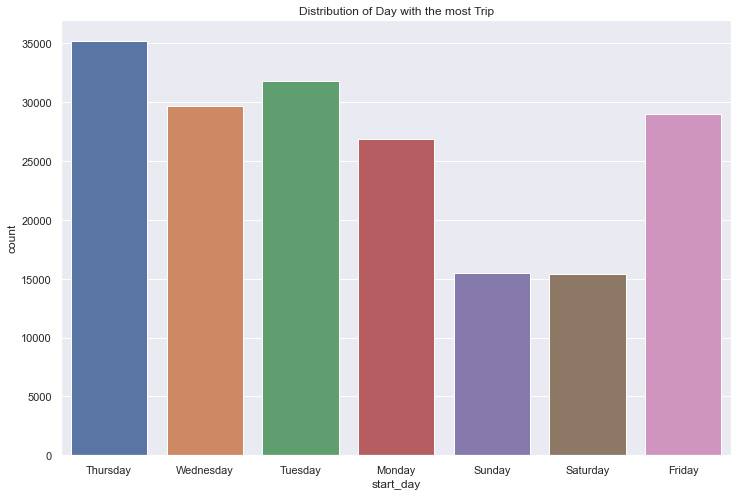

In [11]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title('Distribution of Day with the most Trip')
sn.countplot(df['start_day'])

Both male and females age ranges have the same median age

<AxesSubplot:title={'center':'Age Vs Gender Relationship'}, xlabel='member_gender', ylabel='member_age'>

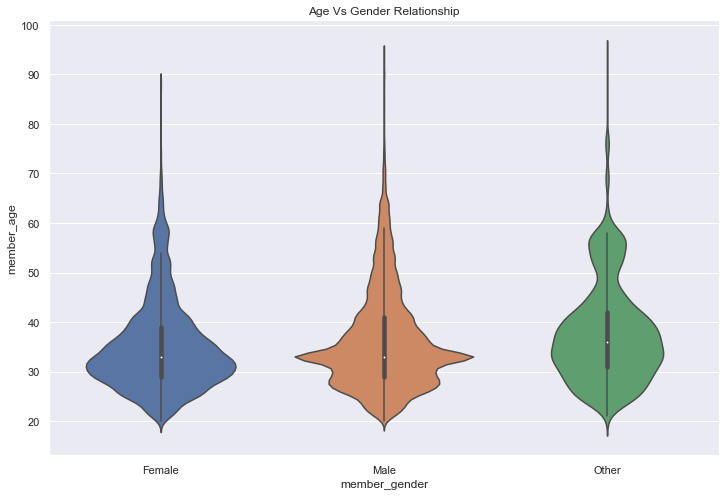

In [21]:
# Age range vs Gender

sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Vs Gender Relationship")
sn.violinplot(data=df, x='member_gender', y='member_age')

We can see that majority of the users are subscribers. They account to a little above

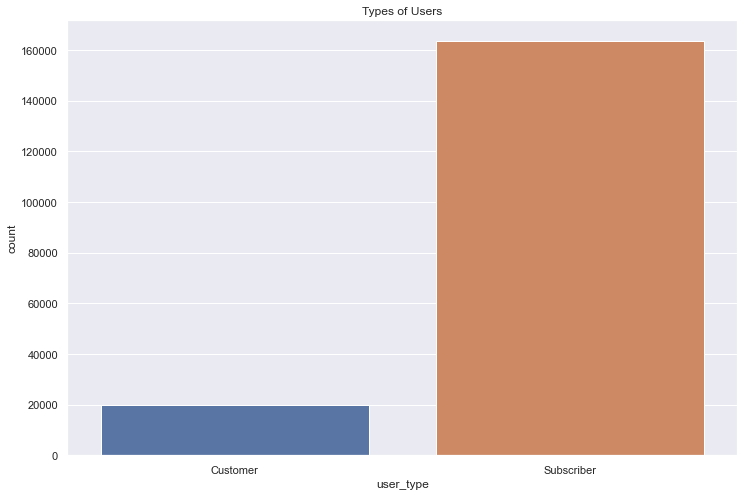

In [13]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title("Types of Users")
sn.countplot(df.user_type);

## Bivariate Data Analysis


it can be deduced that most people hire bikes on the weekends (Sunday and Saturday).

<AxesSubplot:title={'center':'Duration of trips during the Weekday'}, xlabel='start_day', ylabel='duration_min'>

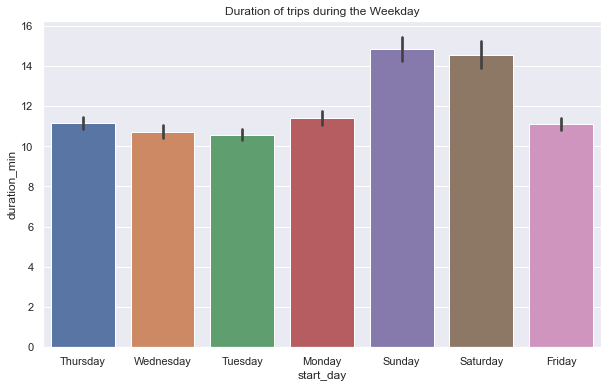

In [18]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,6])
plt.title("Duration of trips during the Weekday")
sn.barplot(data=df, x = 'start_day', y='duration_min')

Most age groups with largest average of trip duration are 21 and 77

<AxesSubplot:title={'center':'Trips Durations among Age Group'}, xlabel='member_age', ylabel='duration_min'>

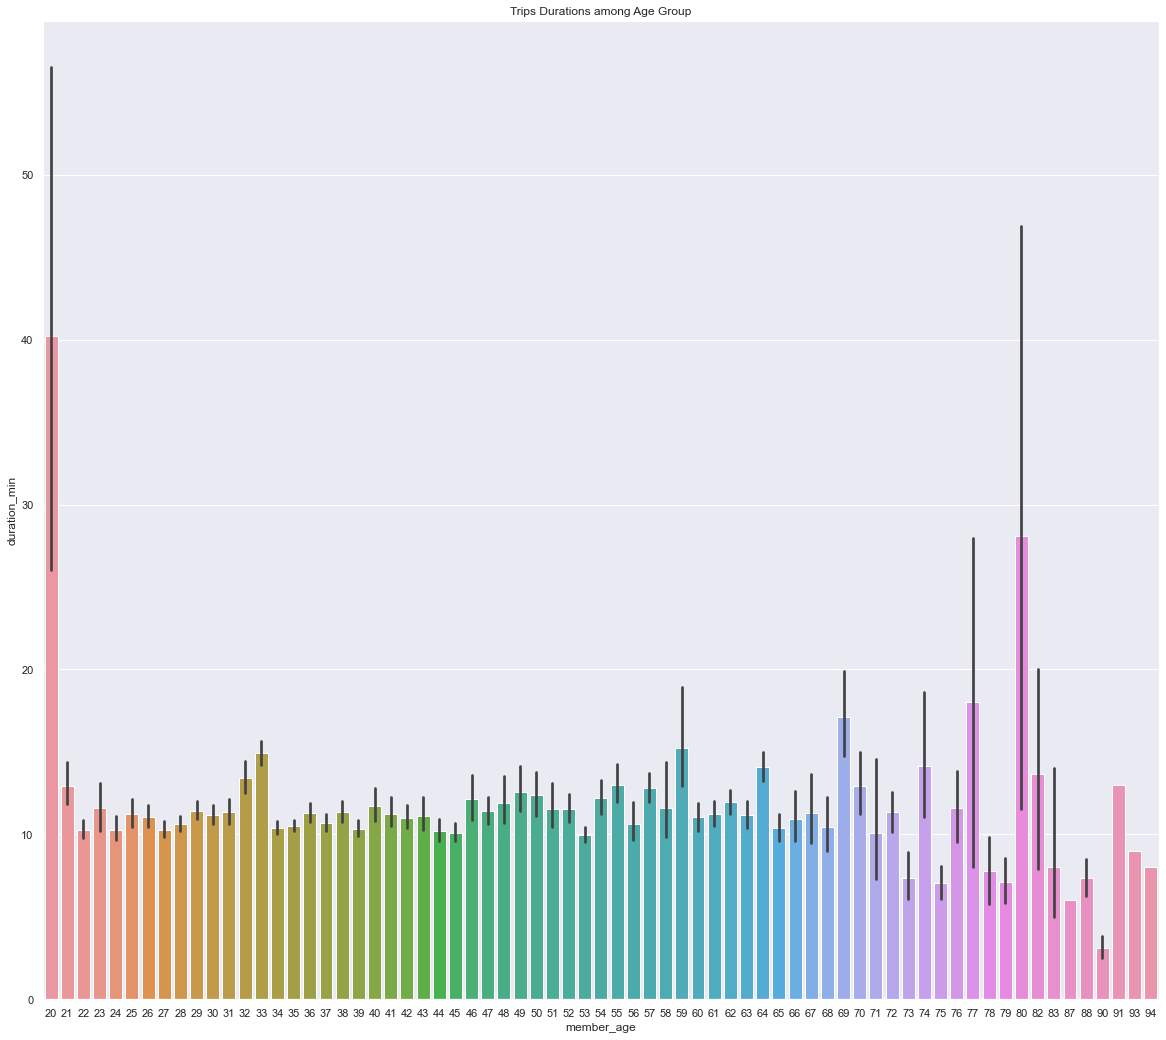

In [19]:
# Trip duration vs Age Group

sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,18))
plt.title('Trips Durations among Age Group')
sn.barplot(data=df, x='member_age', y='duration_min')

Most the customers are between the ages of 30 and 39. While the age range of  majority of subscribers is 30 and 41 years. 

<AxesSubplot:title={'center':'Age Range Among Users'}, xlabel='user_type', ylabel='member_age'>

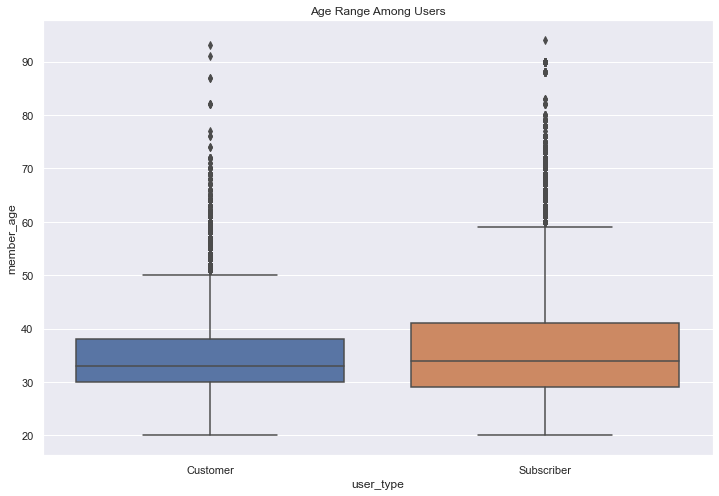

In [20]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Range Among Users")
sn.boxplot(data=df, x='user_type', y='member_age')

## Multivariate Data Analysis



### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: line 1: Part_II_Filename: No such file or directory


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
